# "First Try" Notebook
### Mainly on 15min and hourly ticker 
This first notebook is there to first dive into the different statistical analysis tools, and have a better understanding of the process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sqlalchemy

import statsmodels.api as sm
import statsmodels.tsa as smt

# Importing and preping the data

In [3]:
all_crypto_15 = pd.read_csv('../data/ALL_15.csv')
all_crypto_15.head()

,open_time,close_AAVEUSDT,close_AUTOUSDT,close_BCHUSDT,close_BETHUSDT,close_BIFIUSDT,close_BNBUSDT,close_BTCUSDT,close_ETHUSDT,close_GMXUSDT,...,close_ILVUSDT,close_KP3RUSDT,close_LTCUSDT,close_MKRUSDT,close_PAXGUSDT,close_QNTUSDT,close_QUICKUSDT,close_XMRUSDT,close_YFIIUSDT,close_YFIUSDT
0,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,301.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 04:15:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,298.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 04:30:00,NaN,NaN,NaN,NaN,NaN,NaN,4280.00,299.39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 04:45:00,NaN,NaN,NaN,NaN,NaN,NaN,4310.07,299.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4308.83,301.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# all_crypto_15.info()
top_history_depth = pd.DataFrame(all_crypto_15.count().sort_values(ascending=False).head(7)).reset_index()
list_column = top_history_depth["index"].iloc[1:].to_list()
list_crypto = top_history_depth["index"].str.split("_",expand=True).iloc[1:,1].to_list()
print(list_column)
print(list_crypto)

['close_ETHUSDT', 'close_BTCUSDT', 'close_BNBUSDT', 'close_LTCUSDT', 'close_XMRUSDT', 'close_BCHUSDT']
['ETHUSDT', 'BTCUSDT', 'BNBUSDT', 'LTCUSDT', 'XMRUSDT', 'BCHUSDT']


We want to have enough data, and don't want to select all the crypto at first so we will focus on the first 6 crypto in history depth

In [223]:
working_df = all_crypto_15.set_index('open_time')[list_column].dropna()
working_df.index = pd.to_datetime(working_df.index)
working_df = working_df.loc['2021']

# Statistical Analysis
### -ADF

In [224]:
adf_columns = ["adf","pvalue","usedlag","#_of_obs","critical values","icbest","1%","5%","10%"]

In [225]:
# adf_df = pd.DataFrame(columns = adf_columns)
# for ticker in working_df.columns :
#     print(ticker)
#     ans = smt.stattools.adfuller(np.array(working_df[ticker].dropna().values,dtype = 'float32'))
    
#     ans_df = pd.DataFrame([ans],columns = adf_columns,index= [f"{ticker}"])
#     ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= [f"{ticker}"]))
#     ans_df.drop('critical values',axis=1)

#     adf_df = pd.concat([adf_df,ans_df],axis = 0)

In [226]:
# adf_df

In [227]:
# adf_df = pd.DataFrame(columns = adf_columns)
# working_df_diff = working_df.diff()
# for ticker in working_df.columns :
#     print(ticker)
#     ans = smt.stattools.adfuller(np.array(working_df_diff[ticker].dropna().values,dtype = 'float32'))
    
#     ans_df = pd.DataFrame([ans],columns = adf_columns,index= [f"{ticker}"])
#     ans_df = ans_df.join(pd.DataFrame([ans_df['critical values'].values[0]],index= [f"{ticker}"]))
#     # ans_df.drop('critical values',axis=1)

#     adf_df_diff = pd.concat([adf_df_diff,ans_df],axis = 0)

# adf_df_diff.drop('critical values',axis=1,inplace = True)
# adf_df_diff

# OLS Regression

In our case we decide to model the BTC from other crypto currencies

In [228]:
endog = working_df['close_BTCUSDT']

# endog = sm.add_constant(endog)

exog  = working_df.drop('close_BTCUSDT',axis = 1)

In [229]:
model = sm.OLS(endog= endog,exog = exog)
model_calibrated = model.fit()

model_calibrated.params

close_ETHUSDT      6.784231
close_BNBUSDT    -34.828255
close_LTCUSDT    336.312121
close_XMRUSDT    140.018855
close_BCHUSDT    -91.922752
dtype: float64

In [230]:
model_calibrated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          close_BTCUSDT   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          9.569e+05
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                        0.00
Time:                        01:04:27   Log-Likelihood:                     -3.4075e+05
No. Observations:               34975   AIC:                                  6.815e+05
Df Residuals:                   34970   BIC:                                  6.815e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
close_ETHUSDT     6.7842      0.039    175.392      0.000       6.708       6.860
close_BNBUSDT   -34.8283      0.303   -115.088      0.000     -35.421     -34.235
close_LTCUSDT   336.3121      0.920    365.532      0.000     334.509     338.115
close_XMRUSDT   140.0189      0.815    171.712      0.000     138.421     141.617
close_BCHUSDT   -91.9228      0.339   -271.537      0.000     -92.586     -91.259
==============================================================================
Omnibus:                     1137.895   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1735.436
Skew:                          -0.320   Prob(JB):                         0.00
Kurtosis:                       3.884   Cond. No.                         133.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
spread = working_df['close_BTCUSDT'] - model_calibrated.predict()

# Plots

In [232]:
price_df_norm = working_df.dropna().copy()
for c in price_df_norm.columns : 
    price_df_norm[c] = price_df_norm[c] / price_df_norm[c].iloc[0]

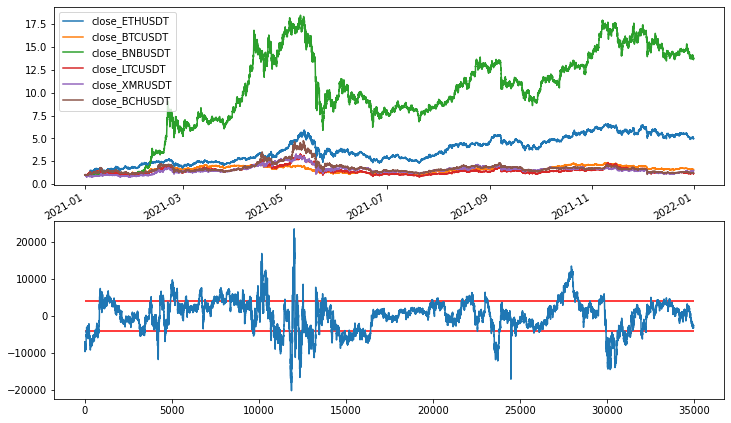

In [233]:
fig,ax = plt.subplots(2,1,figsize = (12,8))
price_df_norm.plot(ax = ax[0])


ax[1].plot(spread.values)
ax[1].hlines(np.std(spread),xmin = 0,xmax = len(spread),color = 'r')
ax[1].hlines(-np.std(spread),xmin = 0,xmax = len(spread),color = 'r')

In [235]:
working_df.corr()

,close_ETHUSDT,close_BTCUSDT,close_BNBUSDT,close_LTCUSDT,close_XMRUSDT,close_BCHUSDT
close_ETHUSDT,1.000000,0.561460,0.873473,0.336048,0.427960,0.297135
close_BTCUSDT,0.561460,1.000000,0.631515,0.670692,0.503091,0.384119
close_BNBUSDT,0.873473,0.631515,1.000000,0.551927,0.690279,0.510944
close_LTCUSDT,0.336048,0.670692,0.551927,1.000000,0.802080,0.888887
close_XMRUSDT,0.427960,0.503091,0.690279,0.802080,1.000000,0.891734
close_BCHUSDT,0.297135,0.384119,0.510944,0.888887,0.891734,1.000000


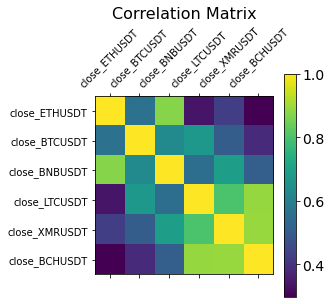

In [238]:
plt.matshow(working_df.corr())

plt.xticks(range(working_df.select_dtypes(['number']).shape[1]), working_df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(working_df.select_dtypes(['number']).shape[1]), working_df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()